In [1]:
import numpy as np
from numpy.lib.utils import who
import pandas as pd
import re
import os
from tqdm import tqdm

table = {
    'date': [],
    'icon01_x': [], 'icon01_y': [],
    'icon02_x': [], 'icon02_y': [],
    'icon03_x': [], 'icon03_y': [],
    'icon04_x': [], 'icon04_y': [],
    'icon05_x': [], 'icon05_y': [],
    'icon06_x': [], 'icon06_y': [],
    'icon07_x': [], 'icon07_y': [],
    'icon08_x': [], 'icon08_y': [],
    # 'icon09_x': [], 'icon09_y': [],
    # 'icon10_x': [], 'icon10_y': [],
    'icon11_x': [], 'icon11_y': [],
    # 'icon12_x': [], 'icon12_y': [],
    # 'icon13_x': [], 'icon13_y': [],
    # 'icon14_x': [], 'icon14_y': [],
    'icon15_x': [], 'icon15_y': []
    # 'icon16_x': [], 'icon16_y': [],
    # 'icon17_x': [], 'icon17_y': [],
    # 'icon18_x': [], 'icon18_y': [],
    # 'icon19_x': [], 'icon19_y': []
}

filenames = os.listdir('KOSIS_Data')
id_list = ['01', '02', '03', '04', '05', '06', '07', '08', '11', '15']

for file in tqdm(filenames):
    with open('KOSIS_data/'+file, 'r', encoding='UTF-8') as f:
        data = f.read()

        p = re.compile('Graphbox[^`]*SVG')
        graphbox = p.findall(data)[0]

        p = re.compile('indicatorDate[^`]*span')
        date = p.findall(graphbox)[0][15:24]
        date = ''.join(date.split())
        # print(date)
        table['date'].append(date)

        p = re.compile('<g id="icon0[^>]*>')
        icon_list = p.findall(graphbox)

        for icon in icon_list:
            id = icon[7:16].split('_')[1]
            if id in id_list:
                if 'none' in icon:
                    x, y = None, None
                else:
                    x, y = map(float, icon[icon.index(
                        '(')+1:icon.index(')')].split())
                # print(id, x, y)
                table['icon'+id+'_x'].append(x)
                table['icon'+id+'_y'].append(y)
                # if x == None:
                #     table['icon'+id+'_nx'].append(x)
                #     table['icon'+id+'_ny'].append(y)
                # else:
                #     table['icon'+id+'_nx'].append((x-276.074)/41.4*0.2)
                #     table['icon'+id+'_ny'].append(-(y-276.135)/36.8*1)

wholex_list = []
wholey_list = []
for id in id_list:
    wholex_list.extend(table['icon'+id+'_x'])
    wholey_list.extend(table['icon'+id+'_y'])

wholex_list = np.array(wholex_list)
wholey_list = np.array(wholey_list)

for id in id_list:
    originx_list = np.array(table['icon'+id+'_x'])
    originy_list = np.array(table['icon'+id+'_y'])
    normx_list = []
    normy_list = []
    for i in range(len(originx_list)):
        normx_list.append(
            (originx_list[i] - wholex_list.mean()) / wholex_list.std())
        normy_list.append(
            (originy_list[i] - wholey_list.mean()) / wholey_list.std())
    table['icon'+id+'_nx'] = normx_list
    table['icon'+id+'_ny'] = normy_list


# df = pd.DataFrame(table)
# df.to_csv('data.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 221/221 [00:04<00:00, 47.83it/s]


In [2]:
import matplotlib.pyplot as plt

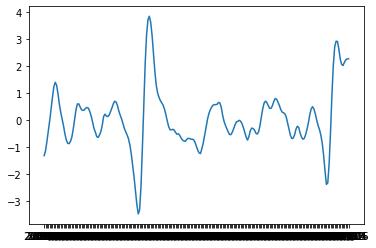

In [11]:
plt.plot(table['date'],table['icon11_nx'])
plt.show()

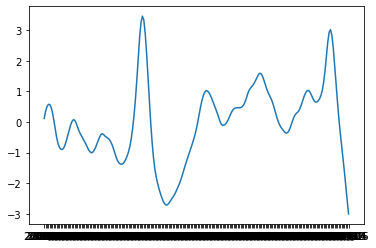

In [12]:
plt.plot(table['date'],table['icon11_ny'])
plt.show()

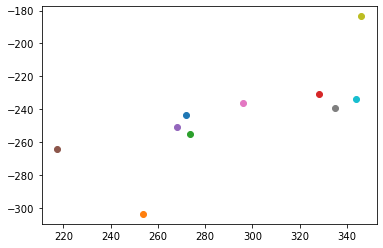

In [4]:
idx = -1
plt.scatter(table['icon01_x'][idx], -table['icon01_y'][idx])
plt.scatter(table['icon02_x'][idx], -table['icon02_y'][idx])
plt.scatter(table['icon03_x'][idx], -table['icon03_y'][idx])
plt.scatter(table['icon04_x'][idx], -table['icon04_y'][idx])
plt.scatter(table['icon05_x'][idx], -table['icon05_y'][idx])
plt.scatter(table['icon06_x'][idx], -table['icon06_y'][idx])
plt.scatter(table['icon07_x'][idx], -table['icon07_y'][idx])
plt.scatter(table['icon08_x'][idx], -table['icon08_y'][idx])
plt.scatter(table['icon11_x'][idx], -table['icon11_y'][idx])
plt.scatter(table['icon15_x'][idx], -table['icon15_y'][idx])
plt.show()
# 정규화 하기전

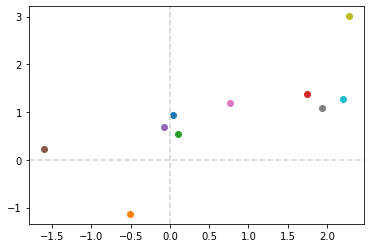

In [5]:
idx = -1
plt.scatter(table['icon01_nx'][idx], -table['icon01_ny'][idx])
plt.scatter(table['icon02_nx'][idx], -table['icon02_ny'][idx])
plt.scatter(table['icon03_nx'][idx], -table['icon03_ny'][idx])
plt.scatter(table['icon04_nx'][idx], -table['icon04_ny'][idx])
plt.scatter(table['icon05_nx'][idx], -table['icon05_ny'][idx])
plt.scatter(table['icon06_nx'][idx], -table['icon06_ny'][idx])
plt.scatter(table['icon07_nx'][idx], -table['icon07_ny'][idx])
plt.scatter(table['icon08_nx'][idx], -table['icon08_ny'][idx])
plt.scatter(table['icon11_nx'][idx], -table['icon11_ny'][idx])
plt.scatter(table['icon15_nx'][idx], -table['icon15_ny'][idx])
plt.axhline(0, color = 'lightgray', linestyle = '--')
plt.axvline(0, color = 'lightgray', linestyle = '--')
plt.show()
# 정규화 하고난후. 하고난 후도 똑같은 거같음. 그리고 그 경기순환도 실제 제공데이터랑도 같음.
# 2021-06

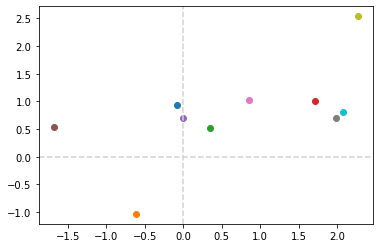

In [6]:
idx = -2
plt.scatter(table['icon01_nx'][idx], -table['icon01_ny'][idx])
plt.scatter(table['icon02_nx'][idx], -table['icon02_ny'][idx])
plt.scatter(table['icon03_nx'][idx], -table['icon03_ny'][idx])
plt.scatter(table['icon04_nx'][idx], -table['icon04_ny'][idx])
plt.scatter(table['icon05_nx'][idx], -table['icon05_ny'][idx])
plt.scatter(table['icon06_nx'][idx], -table['icon06_ny'][idx])
plt.scatter(table['icon07_nx'][idx], -table['icon07_ny'][idx])
plt.scatter(table['icon08_nx'][idx], -table['icon08_ny'][idx])
plt.scatter(table['icon11_nx'][idx], -table['icon11_ny'][idx])
plt.scatter(table['icon15_nx'][idx], -table['icon15_ny'][idx])
plt.axhline(0, color = 'lightgray', linestyle = '--')
plt.axvline(0, color = 'lightgray', linestyle = '--')
plt.show()
# 정규화 하고난후. 하고난 후도 똑같은 거같음. 그리고 그 경기순환도 실제 제공데이터랑도 같음.
# 2021-05

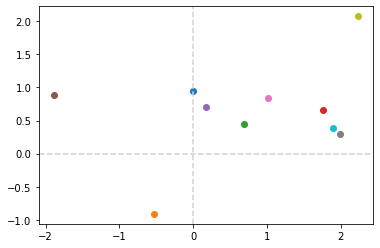

In [7]:
idx = -3
plt.scatter(table['icon01_nx'][idx], -table['icon01_ny'][idx])
plt.scatter(table['icon02_nx'][idx], -table['icon02_ny'][idx])
plt.scatter(table['icon03_nx'][idx], -table['icon03_ny'][idx])
plt.scatter(table['icon04_nx'][idx], -table['icon04_ny'][idx])
plt.scatter(table['icon05_nx'][idx], -table['icon05_ny'][idx])
plt.scatter(table['icon06_nx'][idx], -table['icon06_ny'][idx])
plt.scatter(table['icon07_nx'][idx], -table['icon07_ny'][idx])
plt.scatter(table['icon08_nx'][idx], -table['icon08_ny'][idx])
plt.scatter(table['icon11_nx'][idx], -table['icon11_ny'][idx])
plt.scatter(table['icon15_nx'][idx], -table['icon15_ny'][idx])
plt.axhline(0, color = 'lightgray', linestyle = '--')
plt.axvline(0, color = 'lightgray', linestyle = '--')
plt.show()
# 정규화 하고난후. 하고난 후도 똑같은 거같음. 그리고 그 경기순환도 실제 제공데이터랑도 같음.
# 2021-04

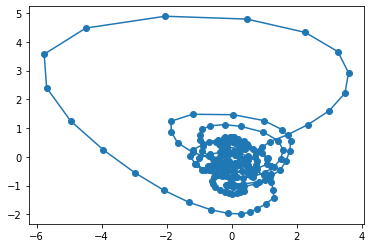

In [8]:
a = table['icon01_nx']
b = table['icon01_ny']
plt.scatter(a,b)
plt.plot(a,b)
plt.show()
# 광공업 생산지수 찍어봤을때 뱅글뱅글 도는거 잘 보임